# HW4 - Pandas exercises

We open with some imports as usual - some of these will be unfamiliar, but bear with me

In [1]:
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# Some helpful functions 
just use these as be and don't worry too much about about them for now, we will learn how they work soon

In [3]:
# Same data manipulation to get USGS streamflow as
# a pandas dataframe as before
def create_usgs_url(site_no, begin_date, end_date):
    return (
        f'https://waterdata.usgs.gov/nwis/dv?'
        f'cb_00060=on&format=rdb&referred_module=sw&'
        f'site_no={site_no}&'
        f'begin_date={begin_date}&'
        f'end_date={end_date}'
    )

def open_usgs_data(site, begin_date, end_date):
    url = create_usgs_url((site), begin_date, end_date)
    response = urllib.request.urlopen(url)
    df = pd.read_table(
        response,
        comment='#',
        skipfooter=1,
        delim_whitespace=True,
        names=['agency', 'site', 'date', 'streamflow', 'quality_flag'],
        index_col=2,
        parse_dates=True
    ).iloc[2:]

    # Now convert the streamflow data to floats and
    # the index to datetimes. When processing raw data
    # it's common to have to do some extra postprocessing
    df['streamflow'] = df['streamflow'].astype(np.float64)
    df.index = pd.DatetimeIndex(df.index)
    return df

def open_daymet_data(lat, lon, begin_date, end_date):
    args = {'lat':  lat, 'lon': lon, 'format': 'csv',
            'start': begin_date, 'end': end_date}
    query = urllib.parse.urlencode(args)
    url = f"https://daymet.ornl.gov/single-pixel/api/data?{query}"
    response = urllib.request.urlopen(url)
    df = pd.read_csv(response, header=6)
    datestring = (df['year'].astype(str) + df['yday'].astype(str))
    dates = pd.to_datetime(datestring, format='%Y%j')
    df.index = pd.DatetimeIndex(dates)
    return df

# Additionally, setting some "metadata" - this will become second nature soon

In [4]:
site = '09506000'
begin_date = '1992-09-25'
end_date = '2022-09-25'
lat = 34.4483605
lon = -111.7898705

# Now open up some datasets from the above commands, you are almost to your exercises

In [5]:
verde_df = open_daymet_data(lat, lon, begin_date, end_date)
usgs_df = open_usgs_data(site, begin_date, end_date)
verde_df = verde_df.reindex(verde_df.index)
verde_df['streamflow'] = usgs_df['streamflow']
verde_df.head()

/tmp/ipykernel_2040/3469173433.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(
/tmp/ipykernel_2040/3469173433.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_table(
/tmp/ipykernel_2040/3469173433.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_table(


,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa),streamflow
1992-09-25,1992,269,42469.79,0.0,413.81,0.0,33.57,12.92,1489.09,129.0
1992-09-26,1992,270,42337.25,0.0,419.69,0.0,34.03,12.61,1459.42,121.0
1992-09-27,1992,271,42204.86,0.0,436.54,0.0,34.89,11.41,1348.48,122.0
1992-09-28,1992,272,42072.64,0.0,421.55,0.0,35.44,12.82,1479.16,127.0
1992-09-29,1992,273,41940.63,0.0,380.67,0.0,33.42,14.18,1616.07,120.0


# 1. How do you see a quick summary of what is in `verde_df`?

In [11]:
# TODO: your code here
verde_df.head()

,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa),streamflow
1992-09-25,1992,269,42469.79,0.0,413.81,0.0,33.57,12.92,1489.09,129.0
1992-09-26,1992,270,42337.25,0.0,419.69,0.0,34.03,12.61,1459.42,121.0
1992-09-27,1992,271,42204.86,0.0,436.54,0.0,34.89,11.41,1348.48,122.0
1992-09-28,1992,272,42072.64,0.0,421.55,0.0,35.44,12.82,1479.16,127.0
1992-09-29,1992,273,41940.63,0.0,380.67,0.0,33.42,14.18,1616.07,120.0


# 1. How do you get a listing of the columns in `verde_df`?

In [15]:
# TODO: 
verde_df.columns

Index(['year', 'yday', 'dayl (s)', 'prcp (mm/day)', 'srad (W/m^2)',
       'swe (kg/m^2)', 'tmax (deg c)', 'tmin (deg c)', 'vp (Pa)',
       'streamflow'],
      dtype='object')

# 2. How do you select the streamflow column in `verde_df`?

In [20]:
# TODO: your code here
verde_df['streamflow'].tolist()

[129.0,
 121.0,
 122.0,
 127.0,
 120.0,
 107.0,
 111.0,
 116.0,
 107.0,
 106.0,
 111.0,
 117.0,
 119.0,
 117.0,
 121.0,
 121.0,
 123.0,
 122.0,
 135.0,
 136.0,
 132.0,
 113.0,
 115.0,
 139.0,
 138.0,
 141.0,
 134.0,
 136.0,
 144.0,
 155.0,
 164.0,
 171.0,
 182.0,
 181.0,
 227.0,
 257.0,
 210.0,
 195.0,
 194.0,
 188.0,
 186.0,
 186.0,
 188.0,
 185.0,
 188.0,
 186.0,
 186.0,
 191.0,
 196.0,
 196.0,
 197.0,
 197.0,
 195.0,
 192.0,
 189.0,
 183.0,
 183.0,
 190.0,
 199.0,
 202.0,
 205.0,
 203.0,
 204.0,
 204.0,
 203.0,
 204.0,
 202.0,
 198.0,
 201.0,
 191.0,
 228.0,
 304.0,
 294.0,
 254.0,
 252.0,
 252.0,
 243.0,
 237.0,
 235.0,
 236.0,
 237.0,
 228.0,
 226.0,
 223.0,
 225.0,
 225.0,
 222.0,
 218.0,
 212.0,
 210.0,
 207.0,
 207.0,
 207.0,
 210.0,
 1320.0,
 6540.0,
 6600.0,
 1690.0,
 1240.0,
 1190.0,
 893.0,
 661.0,
 554.0,
 13500.0,
 63400.0,
 18800.0,
 5260.0,
 5380.0,
 4320.0,
 2110.0,
 2930.0,
 5490.0,
 3830.0,
 27900.0,
 17400.0,
 15700.0,
 7640.0,
 4710.0,
 3550.0,
 3380.0,
 2240.0,
 1

# 3. How do you plot the streamflow in `verde_df`?

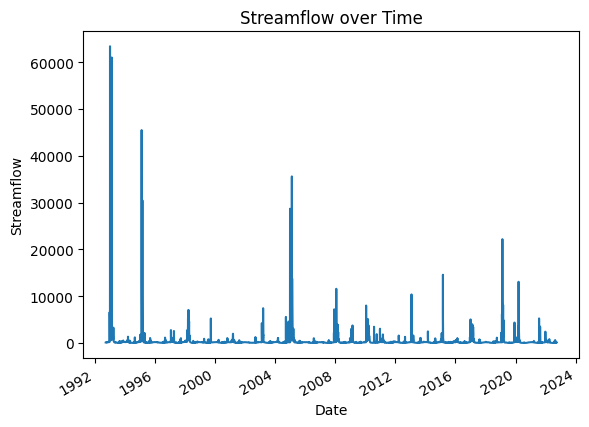

In [27]:
# TODO: your code here
verde_df['streamflow'].plot(title='Streamflow over Time')
plt.ylabel('Streamflow')
plt.xlabel('Date')
plt.show()

336.82214814138274


/tmp/ipykernel_2040/3595375113.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  mean_annual_sf = verde_df['streamflow'].resample('Y').mean()


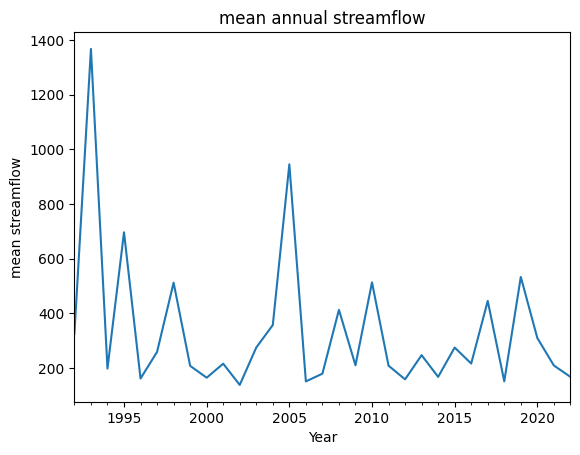

In [46]:
# Calculate mean annual streamflow

mean_annual_sf = verde_df['streamflow'].mean()
# Plot mean annual streamflow
print(mean_annual_sf)

mean_annual_sf = verde_df['streamflow'].resample('Y').mean()
mean_annual_sf.plot()
plt.title('mean annual streamflow')
plt.xlabel('Year')
plt.ylabel('mean streamflow')
plt.show()


# 5. How do you get the last streamflow value from `verde_df`?

In [53]:
# TODO: your code here
verde_df.last_valid_index()

verde_df.streamflow[:-1]

1992-09-25    129.0
1992-09-26    121.0
1992-09-27    122.0
1992-09-28    127.0
1992-09-29    120.0
              ...  
2022-09-20    103.0
2022-09-21    111.0
2022-09-22    147.0
2022-09-23    190.0
2022-09-24    166.0
Name: streamflow, Length: 10949, dtype: float64

# 4. What is the mean streamflow value for the 30 year period?

In [ ]:
# TODO: your code here

# 5. What is the maximum value for the 30 year period?


In [ ]:
# TODO: your code here

# 6. How do you find the maximum streamflow value for each year?

In [ ]:
# TODO: your code here

# 7. How do you make a scatter plot of `dayl (s)` versus `tmax (deg c)`?
#### INFO: `dayl` is the day length in seconds and `tmax` is the daily maximum temperature

In [ ]:
# TODO: your code here

# 8. How do you calculate (and plot) the mean daily minimum temperature for each day of year?  And plot it?
#### INFO: Daily minimum temperature is in the column `tmin (deg c)`

In [ ]:
# TODO: your code here

# 11. What is the average value of all columns for October 10 across all years?
#### INFO: October 10 is the 283rd day of year

In [ ]:
# TODO: your code here

# NEW DATASET : Iris
Loading data - here I provide a dataset for you
to work with for the first set of exercises

The iris dataset is a classic and very easy 
multi-class classification dataset. It describes
measurments of sepal & petal width/length for three
different species of iris

In [ ]:
d = load_iris()
iris_df = pd.DataFrame(d['data'], columns=d['feature_names'])
iris_df.index = pd.Series(
    pd.Categorical.from_codes(d.target, d.target_names),
    name='species'
)
iris_df.head()

# 12. How do you view the "unique" species in the `iris_df` index?


In [ ]:
# TODO: your code here

# 13. How do you "locate" only rows for the `versicolor` species?

In [ ]:
# TODO: your code here

# 14. How do you group by the 3 different species and take the mean across the whole dataframe?

In [ ]:
# TODO: your code here

# 15. How do you make a scatter plot of the `sepal length (cm)` versus the `petal length (cm)` for the `versicolor`` species?

In [ ]:
# TODO: your code here

# BONUS OPTION: 
 Do the same plot for `setosa` and `virginica` all on the same figure. Color them 'tomato', 'darkcyan', and 'darkviolet', respectively.  Worth 1 point extra credit


In [ ]:
# TODO: your code here